## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [31]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [32]:
data_frame = pd.read_csv("QueryResults (1).csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [33]:
head = data_frame.head
tail = data_frame.tail

**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [34]:
dimensions = data_frame.shape

**Challenge**: Count the number of entries in each column of the dataframe

In [35]:
data_frame.count()

,0
m,2901
TagName,2901
Unnamed: 2,2901


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [36]:
highest_post_number = data_frame.get("Unnamed: 2").idxmax()
data_frame.get("TagName")[highest_post_number]

'python'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [37]:
count = data_frame.groupby("TagName").count()
print("Fewest Months with an Entry: " + count.idxmin()["Unnamed: 2"])

Fewest Months with an Entry: go


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [38]:
# Convert the 'm' column to datetime objects
data_frame['m'] = pd.to_datetime(data_frame['m'])

In [39]:
# Display the DataFrame information to check data types
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   m           2901 non-null   datetime64[ns]
 1   TagName     2901 non-null   object        
 2   Unnamed: 2  2901 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 68.1+ KB


In [40]:
# Display the first few rows to see the new date format
print("\nFirst 5 rows with updated date format:")
display(data_frame.head())


First 5 rows with updated date format:


,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot **every** single programming language (in the table) on a chart.

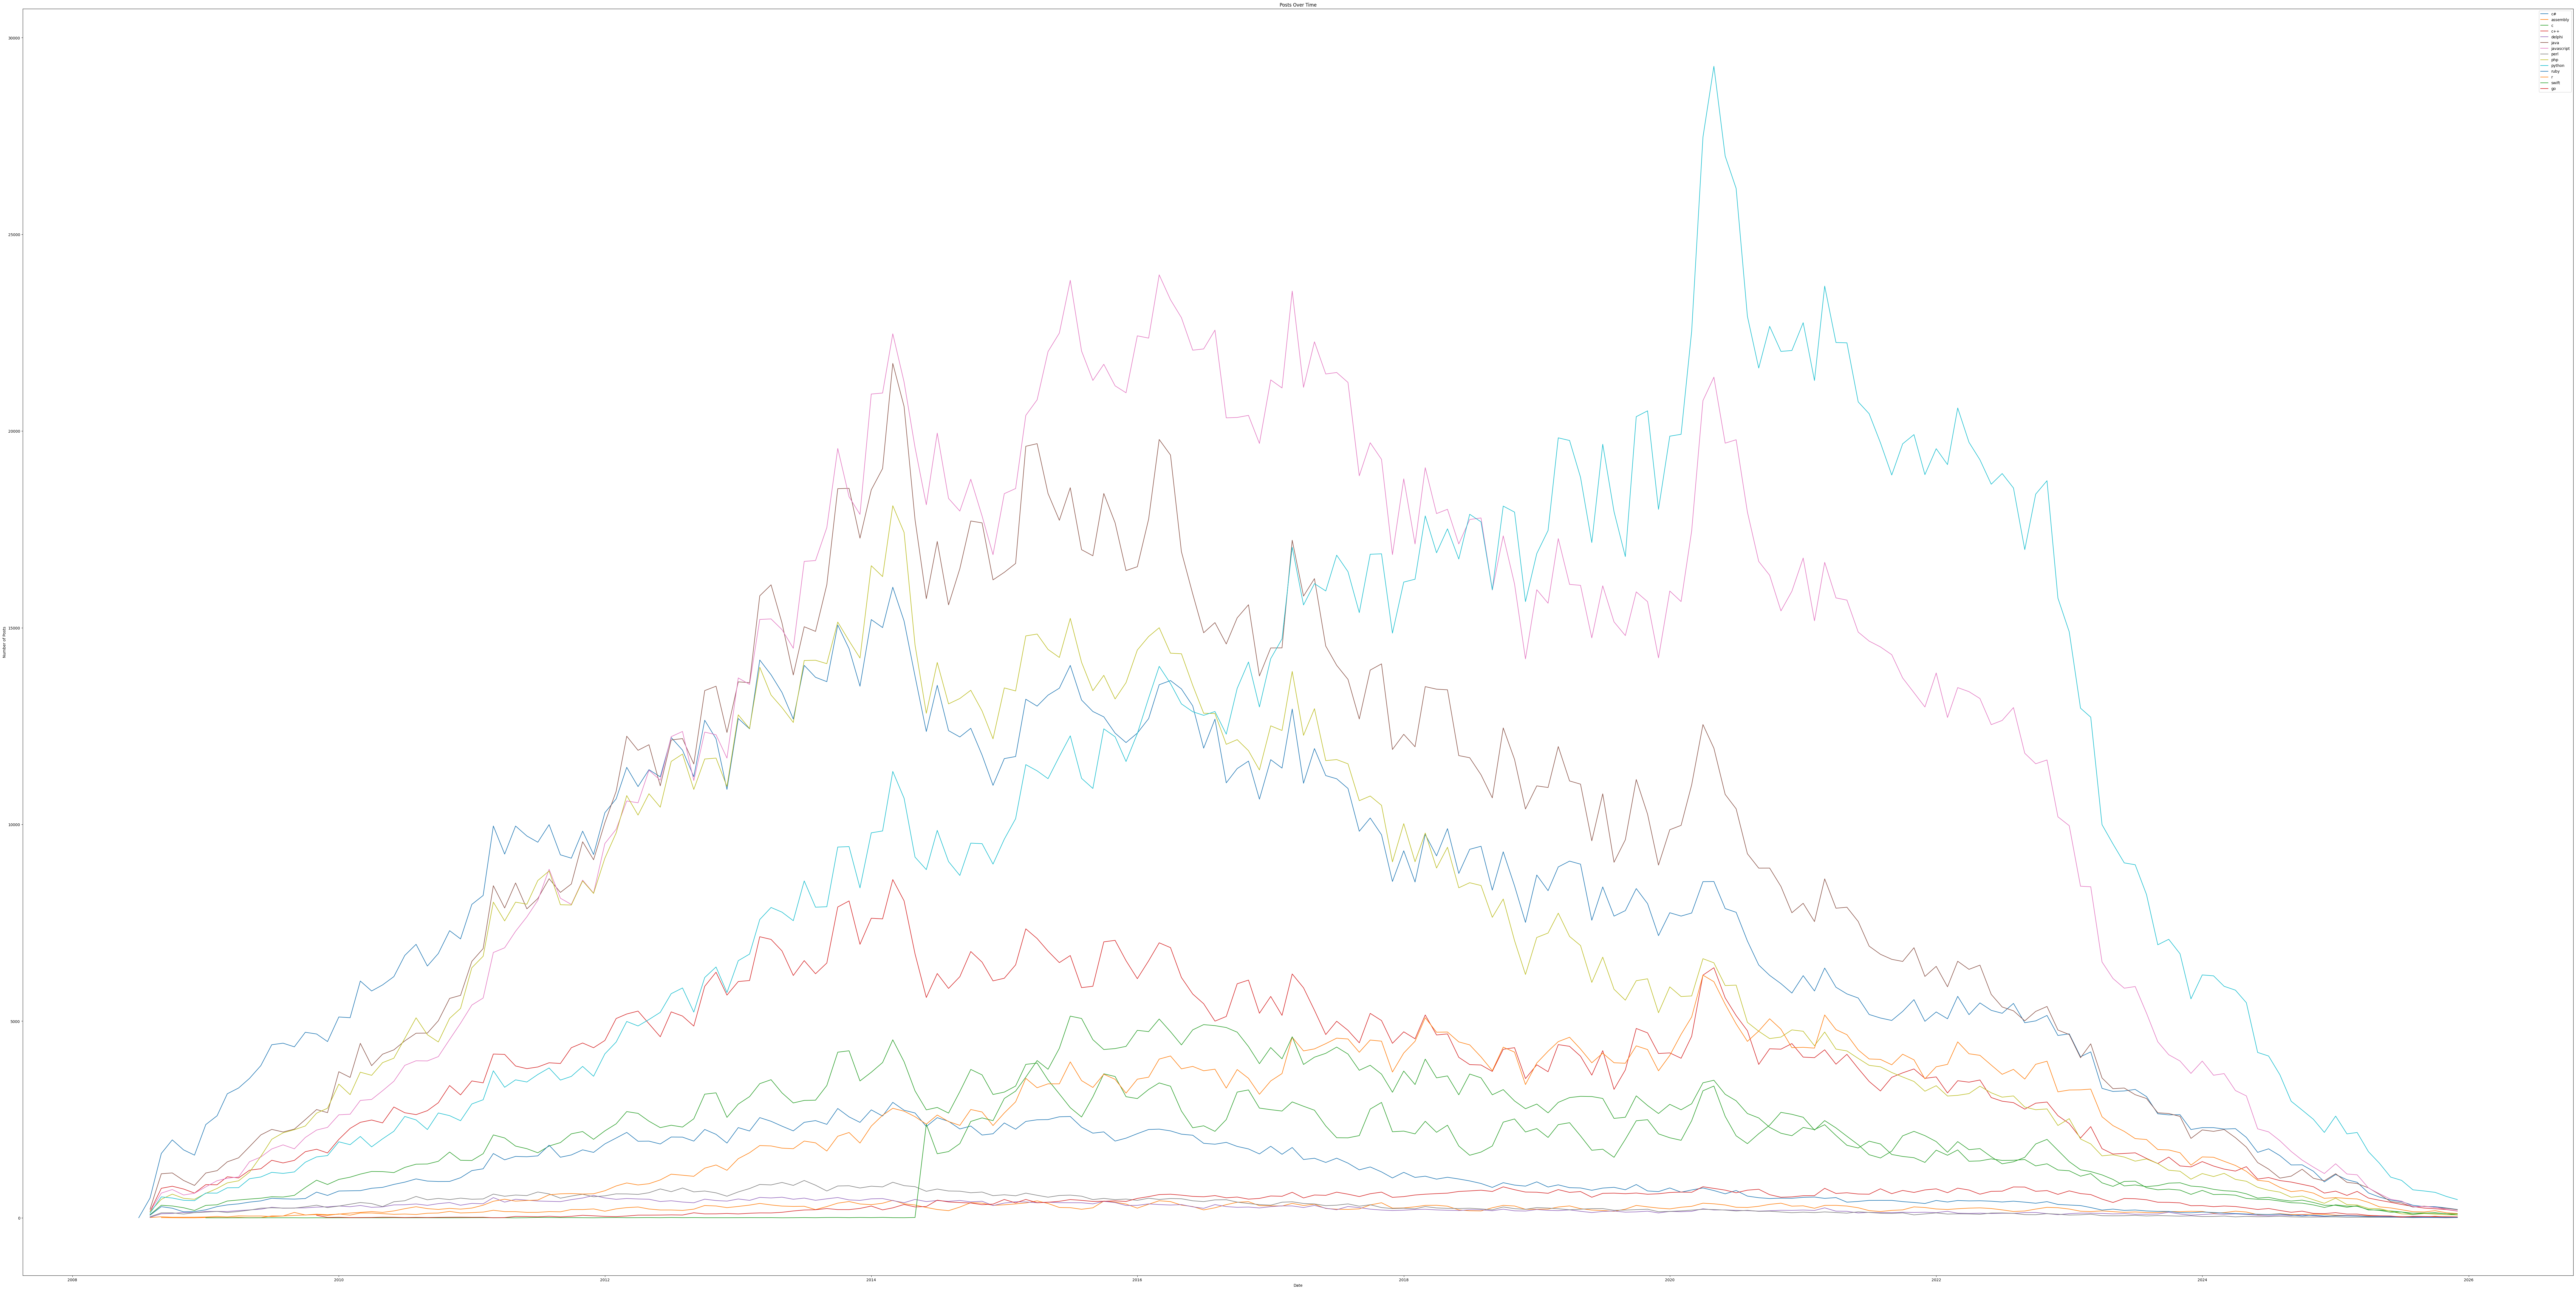

In [47]:
languages = []

for lang in data_frame['TagName']:
    if lang not in languages:
        languages.append(lang)

plt.figure(figsize=(12, 6))

for lang in languages:
    lang_data = data_frame[data_frame['TagName'] == lang]
    x = lang_data['m']
    y = lang_data['Unnamed: 2']
    plt.plot(x, y, label=lang)

plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Posts Over Time')
plt.legend()
plt.show()


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

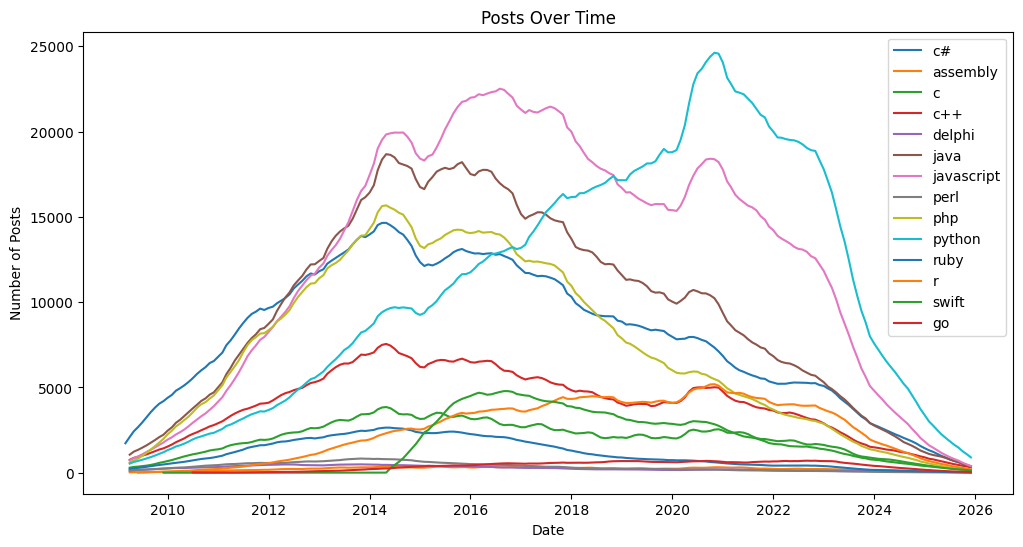

In [51]:
languages = []

for lang in data_frame['TagName']:
    if lang not in languages:
        languages.append(lang)

plt.figure(figsize=(12, 6))

for lang in languages:
    lang_data = data_frame[data_frame['TagName'] == lang]
    x = lang_data['m']
    y = lang_data['Unnamed: 2'].rolling(window=9).mean()
    plt.plot(x, y, label=lang)

plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Posts Over Time')
plt.legend()
plt.show()